# Predição de Sobreviventes no Acidente do Titanic

Sumarizando tudo que estudamos até agora, vamos criar um workflow de resolução de problemas de machine learning que pode ser replicável e adaptável para qualquer dataset sobre o qual pretendemos executar um algoritmo de machine learning. O Workflow consiste em seis passos:

> Definição do problema

> Aquisição de dados de treinamento e teste

> Manipulação, preparo e limpeza dos dados

> Análise, identificação de padrão e exploração dos dados

> Modelagem, predição e resolução do problema

> Visualização e apresentação da solução final

Não é um workflow linear, visto que podemos explorar nossos dados usando visualização, ou mesmo podemos suprimir um ou outro passo ou até combinar alguns passos num só. 

## Definição do problema

A partir de um conjunto de treino que lista se os passageiros sobreviveram ou não ao desastre do Titanic, é possível criar um modelo que determine num conjunto de teste que não possui informação de sobrevivência dos passegeiros se estes sobreviveram ou não?

In [2]:
#importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Aquisição de dados

In [3]:
train_df = pd.read_csv('bases/train.csv')
test_df = pd.read_csv('bases/test.csv')
combine = [train_df, test_df] # quando for necessário aplicar operações em ambos os conjuntos

In [4]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
train_df.info()
print()
print('-'*40)
print()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

### Algumas observações:

> 1) Estamos lidando tanto com features numéricas quanto com features categóricas em ambos os conjuntos

> 2) Existem valores faltantes tanto no conjunto de treino quando no conjunto de teste

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Validando hipóteses

Vamos verificar algumas hipóteses aqui:
> 1) A classe do passageiro(a), seu sexo, se ele(a) possui irmãos(ãs)/conjuge ou se possui pais/filhos interfere em sua sobreviência?

> 2) A faixa de idade interfere de alguma maneira na sobrevivência?

> 3) Todas as features possuem relevância ao predizer se um determinado passageiro irá sobreviver ou não?

> 4) O título de um passageiro(a) interfere em sua sobrevivência? 

#### ToDo 1) Hipótese 1

Crie uma função que receba três parâmetros: dataset, atributo1, atributo2 (este será sempre a coluna 'Survived'). Retorne um dataframe que mostre a proporção dos que sobreviveram para cada valor presente no atributo1. Considere 'Pclass', 'sex', 'SibSp' e 'Parch' como valores possíveis para o atributo1. 

In [9]:
#Dica: filtre os dois atributos (ds[[attr1, attr2]]) e depois agrupe por attr1 e depois tire a média (como attr1 é binário, 
#a média retorna a proporção)
# Resposta

from pandas import DataFrame


def defineSurvive(data, attr1, Survived):
    result = data[[attr1, Survived]].groupby([attr1]).mean()
    return result

defineSurvive(train_df, 'Sex', 'Survived')
# train_df.head()



,Survived
Sex,
female,0.742038
male,0.188908


#### ToDo 2) Hipótese 2

Plote um histograma da variável idade para cada resultado possível da variável Survived 

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

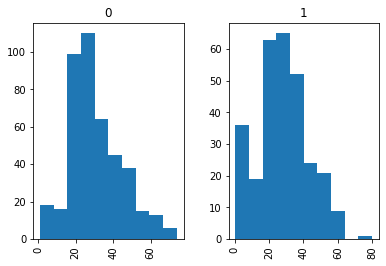

In [12]:
#Dica: olhe os parametros do método hist do Pandas
# Resposta
train_df.hist(column="Age", by="Survived")

#### ToDo 3) Hipótese 3

Julgue as features que estão presentes no dataset. Caso alguma não seja considerada para predizer a sobrevivência de um passageiro, elimine-a

In [14]:
# Resposta
train_df.drop(columns=['Ticket','Cabin'])
test_df.drop(columns=['Ticket','Cabin'])
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### ToDo 4) Hipótese 4
Ao analisar a coluna Name, verificamos uma série de títulos associados ao nome de um passageiro(a). Esses são os títulos presentes na coluna Name: 'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Mlle', 'Ms', 'Mme', 'Master', 'Miss', 'Mr', 'Mrs'.

Use regex para extrair os títulos a partir da coluna Name (faça para cada dataset). Insira os valores numa nova coluna chamada Title. Use Pandas.crosstab para verificar quantos passageiros de cada sexo possuem cada um dos títulos. [pd.crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

In [50]:
#Dica use o método str.extract do pandas
# Resposta

train_df["Tittle"] = train_df["Name"].str.extract(r"(,.*[a-zA-Z]+\.)")[0].str.replace(', ', '').str.replace('.', '')
train_df["Tittle"]



C:\Users\logonrmlocal\AppData\Local\Temp\ipykernel_9912\3443879719.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df["Tittle"] = train_df["Name"].str.extract(r"(,.*[a-zA-Z]+\.)")[0].str.replace(', ', '').str.replace('.', '')


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Tittle, Length: 891, dtype: object

#### ToDo 5) Hipótese 4
Para cada dataset, faça as seguintes substituições na coluna Title:

> 'Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona' por 'Rare'

> 'Mlle' por 'Miss'

> 'Ms' por 'Miss'

> 'Mme' por 'Mrs'

Verifique a porcentagem de sobrevivência para cada grupo (título).

In [61]:
#Dica: use replace para fazer as substituições e a mesma solução do ToDo 1 para encontrar a porcentagem
# Resposta

replaces = ['Lady', 'Countess','Capt', 'Major','Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mrs Martin \(Elizabeth L', 'the Rare']

for x in replaces:
    train_df["Tittle"] = train_df["Tittle"].str.replace(x,'Rare')

train_df["Tittle"] = train_df["Tittle"].str.replace('Mlle','Miss')
train_df["Tittle"] = train_df["Tittle"].str.replace('Ms','Miss')
train_df["Tittle"] = train_df["Tittle"].str.replace('Mme','Mrs')

train_df["Tittle"].value_counts()

C:\Users\logonrmlocal\AppData\Local\Temp\ipykernel_9912\1032545299.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df["Tittle"] = train_df["Tittle"].str.replace(x,'Rare')


Mr        517
Miss      185
Mrs       125
Master     40
Rare       24
Name: Tittle, dtype: int64

#### ToDo 6) Hipótese 4
Mapeie cada um dos título para um número: 'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5. Faça a alteração nos dois datasets

In [62]:
# Dica: use o método map
# Resposta
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

features_cat = train_df[['Tittle']]
features_cat_1hot = encoder.fit_transform(features_cat)
features_cat_1hot


array([[2.],
       [3.],
       [1.],
       [3.],
       [2.],
       [2.],
       [2.],
       [0.],
       [3.],
       [3.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [3.],
       [0.],
       [2.],
       [3.],
       [3.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [3.],
       [2.],
       [2.],
       [1.],
       [2.],
       [4.],
       [3.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [3.],
       [3.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [3.],
       [0.],
       [2.],
       [3.],
       [3.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [3.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],

#### ToDo 7)
Agora podemos eliminar as colunas Name e PassengerId com segurança, já que não serão mais úteis para nossas análises. Elimine-as em ambos os datasets (se houver):

In [ ]:
# Resposta

#### ToDo 8)
Mapeie os valores da coluna Sex para números: 'female':0, 'male':1. Faça a alteração em ambos os datasets

In [ ]:
#Dica: use o método map - mesma solução ToDo 6
# Resposta

#### ToDo 9)

Temos valores faltantes tanto em train_df quanto em test_df e isso ocorre em colunas diferentes. Assim, vamos ter que tratar cada caso de uma maneira:

Em train_df:

> preencha os valores faltantes da coluna Age com a mediana

> preencha os valores faltantes da coluna Embarked com a moda

Em test_df:

> preencha os valores faltantes da coluna Age com a mediana

> preencha os valores faltantes da coluna Fare com a mediana

In [ ]:
# Resposta

In [ ]:
#Verificando
print(train_df.isnull().sum())
print('-'*40)
test_df.isnull().sum()

#### ToDo 10
Precisamos ajustar os valores das colunas Age e Fare para valores ordinais numéricos. O código abaixo usa pd.cut para determinar as classes numéricas. O mesmo ocorre ao executar o código subsequente, mas dessa vez estamos usando pd.qcut, visto que os valores são contínuos, o que exige a classificação por quartis

In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

Elimine as colunas AgeBand e FareBand depois de realizadas as operações

In [ ]:
#Dica: utilize o método loc dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
# Resposta

#### ToDo 11)
Mapeie os valores da coluna Embarked para números: 'S':0, 'C':1, 'Q':2. Faça a alteração em ambos os datasets

In [ ]:
#Dica: use o método map - mesma solução ToDo 6
# Resposta

#### ToDo 12)
Crie uma nova coluna chamada FamilySize que será a soma de SibSp e Parch + 1(caso seja somente o(a) passageiro(a)). Depois, crie uma nova coluna chamada IsAlone, cujo valor será 0, se FamilySize for igual a 1, ou 1, caso contrário

In [ ]:
#Dica: utilize loc
# Resposta

Elimine as colunas Parch, SibSp e FamilySize, pois não vamos utilizá-las mais

In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

Agora que fizemos todas as correções em nossos datasets, podemos ver como ficaram:

In [ ]:
train_df.head()

In [ ]:
test_df.head()

## Treinando nosso algoritmo

In [ ]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

## Testando com novas amostras

Informações do passageiro:
> 1º classe: 1

> Sexo feminimo: 1

> Idade 25: 1

> Fare: 3

> Embarked: 0

> Title: 2

> isAlone: 0

In [ ]:
logreg.predict(np.array([[1,1,1,3,0,2,0]]))

### Fiquem a vontade para testar com novas amostrar. ;)